# 0. Graphical display operations

### figures displays functions

In [1]:
import matplotlib.pyplot as plt
import re
import nltk
import seaborn as sns
import pandas as pd


In [2]:
#display a histogram of len tweets by frequency
def plt_len_tweets(tweets):
  length_dataset = tweets.str.len()
  plt.xlabel('length')
  plt.ylabel('frequency')

  plt.hist(x=length_dataset, bins=15, label='tweets')
  plt.legend()
  plt.show()

# collect the hashtags of tweets for analysing their impacts
def hashtags_collect(tweets):
  hashtags = []

  for tweet in tweets:
    ht = re.findall(r"#(\w+)", tweet)
    # print(ht)
    hashtags.append(ht)

  return hashtags

# display the hastags
def plt_hashtags(hashtags):
  # FreqDist() will return a dictionary with (key='str', value='the number of times the str occurs')
  dic = nltk.FreqDist(hashtags)
  df = pd.DataFrame({'Hashtag': list(dic.keys()),
                      'Count': list(dic.values())})

  # selecting top 20 most frequent hashtags
  df = df.nlargest(columns="Count", n = 20)
  plt.figure(figsize=(16,5))
  ax = sns.barplot(data=df, x= "Hashtag", y = "Count")
  ax.set(ylabel = 'Count')
  plt.show()



#1. Loading and catching a glimpse of dataset

Most profane and vulgar terms in the tweets have been replaced with “$&@*#”. However, please note that the dataset still might contain text that may be considered profane, vulgar, or offensive.

In [3]:
DATA_PATH = 'train_2kmZucJ.csv'

In [4]:
dataframe = pd.read_csv(DATA_PATH)
total_len = len(dataframe)
print(f'dataframe\'s length: {total_len} tweets')
dataframe.head()

dataframe's length: 7920 tweets


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [5]:
# list top 5 positive tweets in dataset
# dataframe[dataframe['label']==0].head()

In [6]:
# list top 5 negetive tweets in dataset
# dataframe[dataframe['label']==1].head()

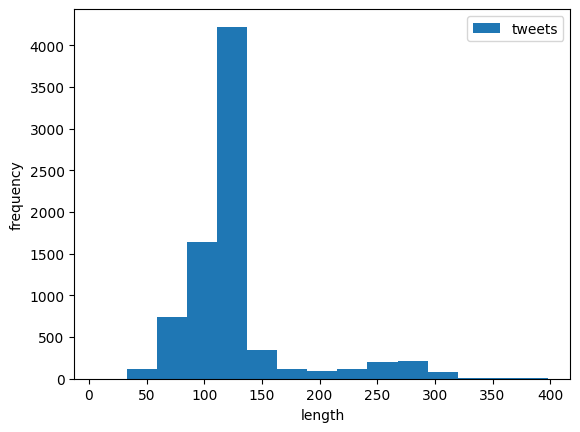

In [7]:
plt_len_tweets(dataframe['tweet'])

__*Understanding the impact of Hashtags on tweets sentiment*__

In [8]:
# extracting hashtags from negative tweets
ht_positive = hashtags_collect(dataframe['tweet'][dataframe['label'] == 0])

# extracting hashtags from negative tweets
ht_negative = hashtags_collect(dataframe['tweet'][dataframe['label'] == 1])

# unnesting list
ht_positive = sum(ht_positive,[])
ht_negative = sum(ht_negative,[])

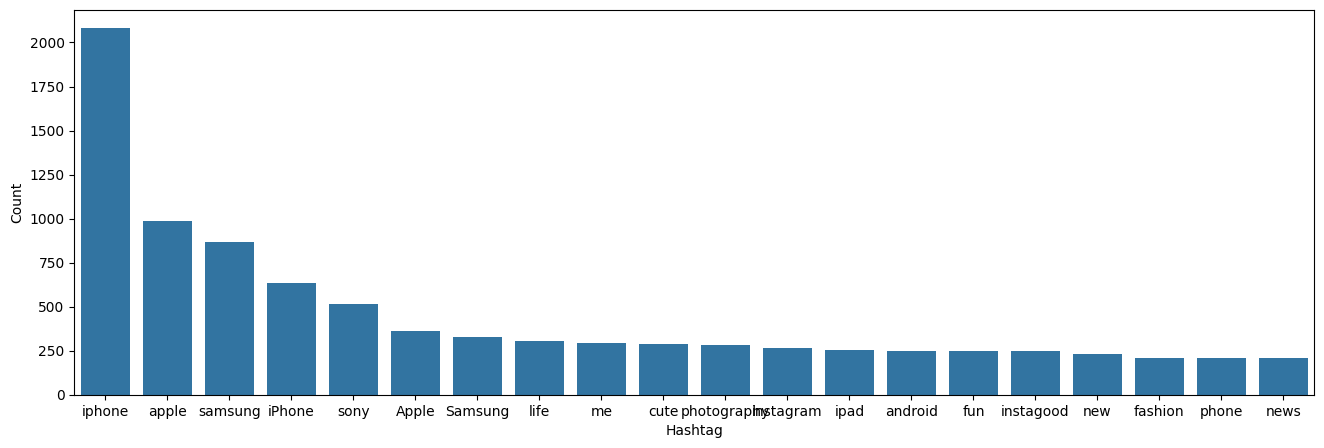

In [9]:
#display the positive #hashtags
plt_hashtags(ht_positive)

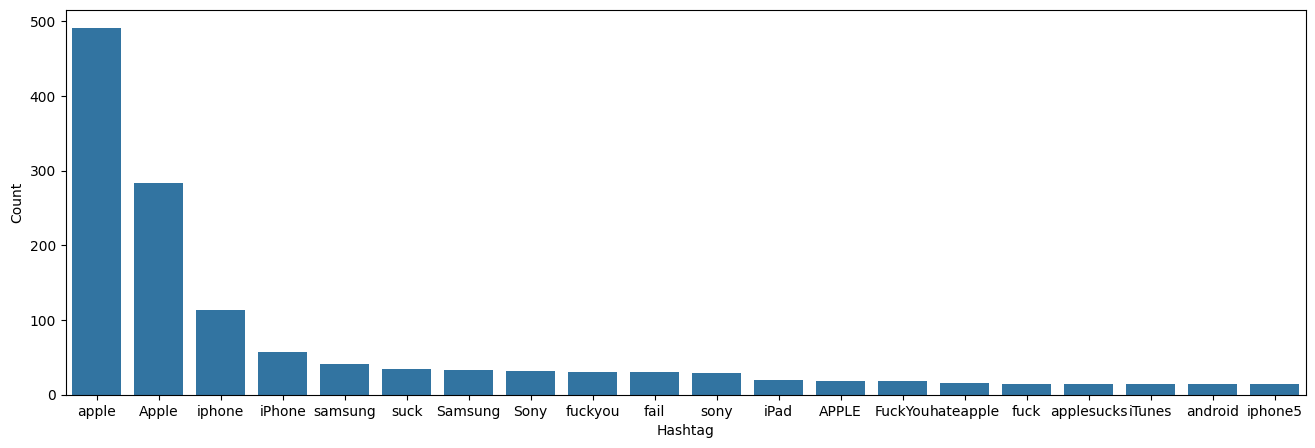

In [10]:
#display the positive #hashtags
plt_hashtags(ht_negative)

__*most of the hashtags has no help to identity the sentiments*__

# 2. Data processing


## 2.1 Data cleanning
remove the redundant/helpless infors

In [11]:
import string

def cleaning(tweets,isSample_predict:bool):
  # this part is for cleanning string text
    if isSample_predict:
      tweets = re.sub(r'http\S+', '', tweets)
      tweets = re.sub(r'@[A-Za-z0-9]+','',tweets)
      tweets = tweets.replace("[0-9]", ' ')
      tweets = re.sub(r'#[A-Za-z0-9]+','',tweets)
      tweets = re.sub(r"[-()\"#/@$&;:<>{}`+=~|.!?,]", '', tweets)
      tweets = re.sub('\s+',' ', tweets).strip()
    else:
      # remove URL
      tweets = tweets.apply(lambda x: re.sub(r'http\S+', '', x))
      # remove @user
      tweets = tweets.apply(lambda x: re.sub(r'@[A-Za-z0-9]+','',x))
      # remove numbers
      # FutureWarning: The default value of regex will change from True to False in a future version.
      tweets = tweets.str.replace("[0-9]", " ", regex = True)
      # remove whitespaces
      tweets = tweets.apply(lambda x:' '.join(x.split()))
      # remove hashtags
      tweets = tweets.apply(lambda x: re.sub(r'#[A-Za-z0-9]+','',x))
      # remove punctuation
      tweets = tweets.apply(lambda x: ''.join(ch for ch in x if ch not in set(string.punctuation)))
      # remove the extra spaces
      tweets = tweets.apply(lambda x: re.sub('\s+',' ', x).strip())

    return tweets

In [12]:
dataframe['tweet_clean'] = cleaning(dataframe['tweet'],False)
dataframe.head()

,id,label,tweet,tweet_clean
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,Test
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks to m...
2,3,0,We love this! Would you go? #talk #makememorie...,We love this Would you go
3,4,0,I'm wired I know I'm George I was made that wa...,Im wired I know Im George I was made that way
4,5,1,What amazing service! Apple won't even talk to...,What amazing service Apple wont even talk to m...


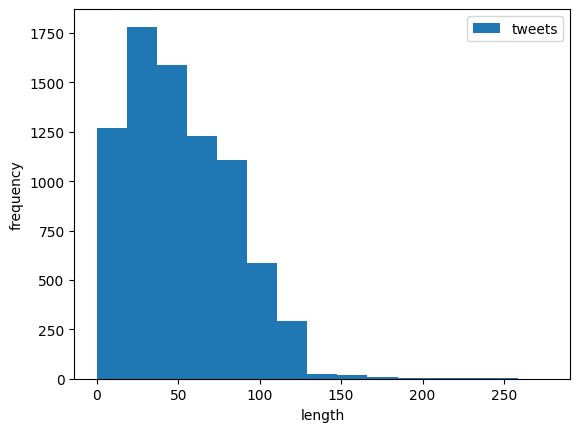

In [13]:
#display the length of tweets after cleaning
plt_len_tweets(dataframe['tweet_clean'])

***As the figure shown, the most number of tweets length between 20 and 80***

In [14]:
dataframe.shape,dataframe.keys()

((7920, 4), Index(['id', 'label', 'tweet', 'tweet_clean'], dtype='object'))

In [15]:
dataframe.head()

,id,label,tweet,tweet_clean
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,Test
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks to m...
2,3,0,We love this! Would you go? #talk #makememorie...,We love this Would you go
3,4,0,I'm wired I know I'm George I was made that wa...,Im wired I know Im George I was made that way
4,5,1,What amazing service! Apple won't even talk to...,What amazing service Apple wont even talk to m...


In [16]:
data_clean = dataframe.drop(['id','tweet'],axis=1)
data_clean.head()
# print(data_clean.shape)

,label,tweet_clean
0,0,Test
1,0,Finally a transparant silicon case Thanks to m...
2,0,We love this Would you go
3,0,Im wired I know Im George I was made that way
4,1,What amazing service Apple wont even talk to m...


In [17]:
# print(data_clean.values[4][1])
data_clean = data_clean.values

#### after data cleaning, some tweet will be nothing left, here I choose to fill a 'empty' word inside

In [18]:
for i in range(total_len):
  if len(data_clean[i][1])==0:
    data_clean[i][1]='empty'
    print(i,data_clean[i][1])

# data_clean[442]

442 empty
3661 empty
4153 empty
5330 empty
5908 empty
6340 empty
6596 empty


## 2.2 Tokenization and word embedding

### Tokenization

break sentences into list of words

spaCy is an advanced modern library for Natural Language Processing, it provides strong support for tokenization in languages other than English.

https://spacy.io/models


### Word Embedding

It is common to use pre-trained word embeddings which provide benefits such as reduced training time and improved overall performance.

**GloVe** is an unsupervised learning algorithm for obtaining vector representations for words. Count-based models learn their vectors by essentially doing dimensionality reduction on the co-occurrence counts matrix.

More information and source refer to [here](https://nlp.stanford.edu/projects/glove/)

here using glove word embedding(pre-trained base on Wikipedia 2014 + Gigaword 5/ 100 dimension) to tranform the tweets into high dimension numerical representations


In [19]:
# import spacy
from torchtext.data.utils import get_tokenizer

# define an tokenization fn
en_tokenizer = get_tokenizer('spacy', language='en_core_web_sm')

In [20]:
from torch.utils.data import Dataset
import torch
import numpy as np
from torch.utils.data import random_split
from torchtext.vocab import GloVe
glove = GloVe(name='6B', dim=100)
en_tokenizer = get_tokenizer('spacy', language='en_core_web_sm')
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
print(torch.__version__)

.vector_cache/glove.6B.zip: 862MB [02:39, 5.40MB/s]                           
100%|█████████▉| 399999/400000 [00:21<00:00, 18545.24it/s]


cuda
2.1.0+cu121


In [21]:
# tokenization
test = 'this movie is quiet good'
text_tok = en_tokenizer(test)
text_tok

['this', 'movie', 'is', 'quiet', 'good']

In [22]:
# embedding
tensor = glove.get_vecs_by_tokens(['this', 'movie', 'is', 'quiet', 'good'], True)
print(tensor)

tensor([[-5.7058e-01,  4.4183e-01,  7.0102e-01, -4.1713e-01, -3.4058e-01,
          2.3390e-02, -7.1537e-02,  4.8177e-01, -1.3121e-02,  1.6834e-01,
         -1.3389e-01,  4.0626e-02,  1.5827e-01, -4.4342e-01, -1.9403e-02,
         -9.6610e-03, -4.6284e-02,  9.3228e-02, -2.7331e-01,  2.2850e-01,
          3.3089e-01, -3.6474e-01,  7.8741e-02,  3.5850e-01,  4.4757e-01,
         -2.2990e-01,  1.8077e-01, -6.2650e-01,  5.3852e-02, -2.9154e-01,
         -4.2560e-01,  6.2903e-01,  1.4393e-01, -4.6004e-02, -2.1007e-01,
          4.8879e-01, -5.7698e-02,  3.7431e-01, -3.0075e-02, -3.4494e-01,
         -2.9702e-01,  1.5095e-01,  2.8248e-01, -1.6578e-01,  7.6131e-02,
         -9.3016e-02,  7.9365e-01, -6.0489e-01, -1.8874e-01, -1.0173e+00,
          3.1962e-01, -1.6344e-01,  5.4177e-01,  1.1725e+00, -4.7875e-01,
         -3.3842e+00, -8.1301e-02, -3.5280e-01,  1.8372e+00,  4.4516e-01,
         -5.2666e-01,  9.9786e-01, -3.2178e-01,  3.3462e-02,  1.1783e+00,
         -7.2905e-02,  3.9737e-01,  2.

## 2.3 Split dataset into train/validation/test sets in batchs

In [23]:
from torch.utils.data import DataLoader, Dataset

In [24]:
class TweetsDataset(Dataset):
  def __init__(self,dataset):
    super().__init__()

    self.tokenizer = get_tokenizer('spacy', language='en_core_web_sm')
    self.dataset = dataset[::]
    self.features = self.dataset[:,1]
    self.labels = torch.from_numpy(self.dataset[:,0].astype(np.int64))
    self.length = len(self.dataset)

  def __len__(self):
    return self.length

  # get the numerical representation of tweets by pre-trained word embeddings GloVe
  def __getitem__(self, index):
    x_token = self.tokenizer(self.features[index])
    x_embed = glove.get_vecs_by_tokens(x_token)
    y = self.labels[index]
    return x_embed, y

In [25]:
train_split = 0.8
val_split = 0.1
test_split = 0.1
totle_len = len(data_clean)

torch.manual_seed(42)
train_data, valid_data, test_data = random_split(dataset=data_clean.copy(),
                                                 lengths=[train_split,val_split,test_split])

len(train_data),len(valid_data),len(test_data)

(6336, 792, 792)

In [26]:
from torch.nn.utils.rnn import pad_sequence

# padding sentences into same dimension
def collate_fn(sample):
    x,y = zip(*sample)
    # print(x)
    x_pad = pad_sequence(x, batch_first=True)
    # print(x_pad)
    y = torch.Tensor(y)
    return x_pad, y

In [27]:
train_loader = DataLoader(dataset = TweetsDataset(train_data),
                        batch_size = 32,
                        shuffle=True,
                        collate_fn=collate_fn)

valid_loader = DataLoader(dataset = TweetsDataset(valid_data),
                        batch_size = 32,
                        shuffle=True,
                        collate_fn=collate_fn)

test_loader = DataLoader(dataset = TweetsDataset(test_data),
                        batch_size = 32,
                        shuffle=True,
                        collate_fn=collate_fn)

len(train_loader),len(valid_loader),len(test_loader)

(198, 25, 25)

In [28]:
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape,len(train_features_batch)

(torch.Size([32, 27, 100]), torch.Size([32]), 32)

In [29]:
for i,(x,y) in enumerate(valid_loader):
  if i < 3:
    print(x)
    print(y)

tensor([[[-0.0562,  0.5597,  0.4774,  ...,  0.2782, -0.6846,  0.5367],
         [-0.4989,  0.7660,  0.8975,  ..., -0.4118,  0.4054,  0.7850],
         [-0.0465,  0.6197,  0.5665,  ..., -0.3762, -0.0325,  0.8062],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0

#3. Modeling

## 3.1 BiLSTM

In [30]:
class Config():
    def __init__(self):
        # model configuration
        self.lstm_hidden_size = 64
        self.dense_hidden_size = 64
        # here using glove embedding with 100 dimension
        self.embed_size = 100
        self.num_layers = 2
        self.num_outputs = 1
        self.dropout = 0.5

In [31]:
import torch.nn as nn

class BiLstmModel(nn.Module):

    def __init__(self, config):
        super().__init__()

        # we already use glove embedding words, so I replace the directly the input with the dropout operation replacing the Embedding layer
        # shape: (batch_size, max_seq_length, lstm_hidden_size * 2)
        self.drop = nn.Dropout(config.dropout)
        self.LSTM = nn.LSTM(input_size=config.embed_size,
                        hidden_size=config.lstm_hidden_size,
                        num_layers=config.num_layers,
                        dropout=config.dropout,
                        batch_first=True,
                        bidirectional=True)

        # because it's a BiLSTM, we need double hidden size of lstm units
        self.linear = nn.Linear(config.lstm_hidden_size * 2,
                             config.dense_hidden_size)
        self.relu = nn.ReLU()
        self.classifier = nn.Linear(config.dense_hidden_size,
                                    config.num_outputs)

    def forward(self, x:torch.Tensor):
      # x shape: [batch, max_word_length, embedding_length]
      embed = self.drop(x)
      # shape: (batch_size, max_seq_length, lstm_hidden_size * 2)
      lstm_hidden_states, _ = self.LSTM(embed)
      # LSTM 的最后一个时刻的隐藏状态, 即句向量
      # shape: (batch, lstm_hidden_size * 2)
      lstm_hidden_states = lstm_hidden_states[:, -1, :]
      # shape: (batch, dense_hidden_size)
      linear_outputs = self.relu(self.linear(lstm_hidden_states))
      # shape: (batch, num_outputs)
      logits = self.classifier(linear_outputs)

      return logits

In [32]:
config = Config()
model_lstm = BiLstmModel(config)
model_lstm.state_dict

<bound method Module.state_dict of BiLstmModel(
  (drop): Dropout(p=0.5, inplace=False)
  (LSTM): LSTM(100, 64, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (linear): Linear(in_features=128, out_features=64, bias=True)
  (relu): ReLU()
  (classifier): Linear(in_features=64, out_features=1, bias=True)
)>

# Functionizing training and test loops

In [33]:
# loss and optimizer
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=0.001)
loss_fn = nn.BCEWithLogitsLoss()

In [34]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
accuracy_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
accuracy_fn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 5.5 MB/s eta 0:00:00


MulticlassAccuracy()

In [35]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [36]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  train_loss, train_acc = 0, 0
  model.to(device)
  model.train()

  for batch, (X, y) in enumerate(data_loader):
    # Send data to GPU
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    logits = model(X).squeeze()

    # Turn logits into prediction probabilities
    pred_probs = torch.sigmoid(logits)

    # Turn prediction probabilities into prediction labels
    pred_label = torch.round(pred_probs)

    # print(logits)
    # print(y)

    # 2a. Calculate loss
    loss = loss_fn(logits, y)
    train_loss += loss
    train_acc += accuracy_fn(pred_label,y)# Go from logits -> pred labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Calculate loss and accuracy per epoch and print out what's happening
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


In [37]:
def valid_step(data_loader: torch.utils.data.DataLoader,
               model: torch.nn.Module,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               is_test=False,
               device: torch.device = device):
  valid_loss, valid_acc = 0, 0
  model.to(device)
  model.eval() # put model in eval mode
  # Turn on inference context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send data to GPU
      X, y = X.to(device), y.to(device)
      # print(X.size())

      # 1. Forward pass
      valid_logits = model(X).squeeze()

      # Turn the test logits into prediction labels
      valid_labels = torch.round(torch.sigmoid(valid_logits))

      # 2. Calculate loss and accuracy
      valid_loss += loss_fn(valid_logits, y)
      valid_acc += accuracy_fn(valid_labels,y)

    # Adjust metrics and print out
    valid_loss /= len(data_loader)
    valid_acc /= len(data_loader)
    print_text = 'Test' if is_test else 'Valid'
    print(f"{print_text} loss: {valid_loss:.5f} | {print_text} accuracy: {valid_acc:.2f}%")

In [38]:
# Measure time
from tqdm.auto import tqdm
train_time_start_on_gpu = timer()

epochs = 100
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(data_loader=train_loader,
             model=model_lstm,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn
  )
  valid_step(data_loader=valid_loader,
             model=model_lstm,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn
  )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.43666 | Train accuracy: 0.79%
Valid loss: 0.40036 | Valid accuracy: 0.79%
Epoch: 1
---------
Train loss: 0.37898 | Train accuracy: 0.83%
Valid loss: 0.36396 | Valid accuracy: 0.84%
Epoch: 2
---------
Train loss: 0.35672 | Train accuracy: 0.85%
Valid loss: 0.34705 | Valid accuracy: 0.86%
Epoch: 3
---------
Train loss: 0.35062 | Train accuracy: 0.85%
Valid loss: 0.35608 | Valid accuracy: 0.86%
Epoch: 4
---------
Train loss: 0.33218 | Train accuracy: 0.86%
Valid loss: 0.33217 | Valid accuracy: 0.86%
Epoch: 5
---------
Train loss: 0.34220 | Train accuracy: 0.86%
Valid loss: 0.34684 | Valid accuracy: 0.86%
Epoch: 6
---------
Train loss: 0.33165 | Train accuracy: 0.86%
Valid loss: 0.33171 | Valid accuracy: 0.86%
Epoch: 7
---------
Train loss: 0.32310 | Train accuracy: 0.86%
Valid loss: 0.33990 | Valid accuracy: 0.87%
Epoch: 8
---------
Train loss: 0.31825 | Train accuracy: 0.87%
Valid loss: 0.33384 | Valid accuracy: 0.87%
Epoch: 9
---------
Train loss: 0.3202

In [39]:
# test the data in test_loader which split by our data from step 2.3
valid_step(data_loader=test_loader,
    model=model_lstm,
    loss_fn=loss_fn,
    is_test=True,
    accuracy_fn=accuracy_fn
)

Test loss: 0.57367 | Test accuracy: 0.86%


# 4. Prediction

In [40]:
from tkinter import Label
def prediction(text:str):
  # text_clean = cleaning(text,True)

  model_lstm.eval()
  with torch.inference_mode():
    text_embed = glove.get_vecs_by_tokens(en_tokenizer(text)).to(device)
    # print(text_embed.shape)
    pred_logit = model_lstm(text_embed.unsqueeze(dim=0))
    pred_scaler = torch.round(torch.sigmoid(pred_logit))

    label = 'positive' if pred_scaler == 0 else 'negative'

    return pred_scaler, label




In [41]:
tweet = 'Ok so my galaxy crashed after one day now I have to wait til Monday for my skyrocket but using iPhone for now...'
print(prediction(tweet))

(tensor([[1.]], device='cuda:0'), 'negative')
